In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import multivariate_normal, norm

A = [0, 0]
SIGMA = [[10, 8], [8, 10]]

Построим **график плотности** $\xi = (\xi_1, \xi_2) \sim N(a, \Sigma)$, где $a=0,~ \Sigma =
    \bigl(\begin{smallmatrix}
    10 & 8 \\ 8 & 10
    \end{smallmatrix} \bigr)$.

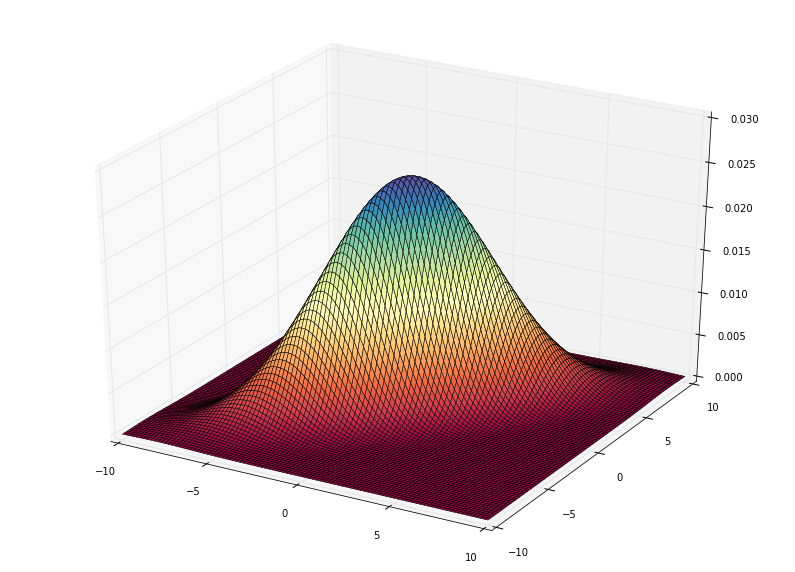

In [12]:
# set axis
x_axis, y_axis = np.mgrid[-10:10:.02, -10:10:.02]
axis = np.empty(x_axis.shape + (2,))
axis[:, :, 0] = x_axis
axis[:, :, 1] = y_axis

# generate distribution
x_dist = multivariate_normal(mean=A, cov=SIGMA)

# draw plot
figure = plt.figure(figsize=(14, 10))
axes = figure.gca(projection='3d')
axes.plot_surface(x_axis, y_axis, x_dist.pdf(axis), 
                  cmap=cm.Spectral, linewidth=0.5)
plt.show()

Построим **графики условной плотности** $f_{\xi_1 \rvert~ \xi_2}(x ~\rvert~ y)$ для $y \in \{-3, 0, 1, 5\}$.

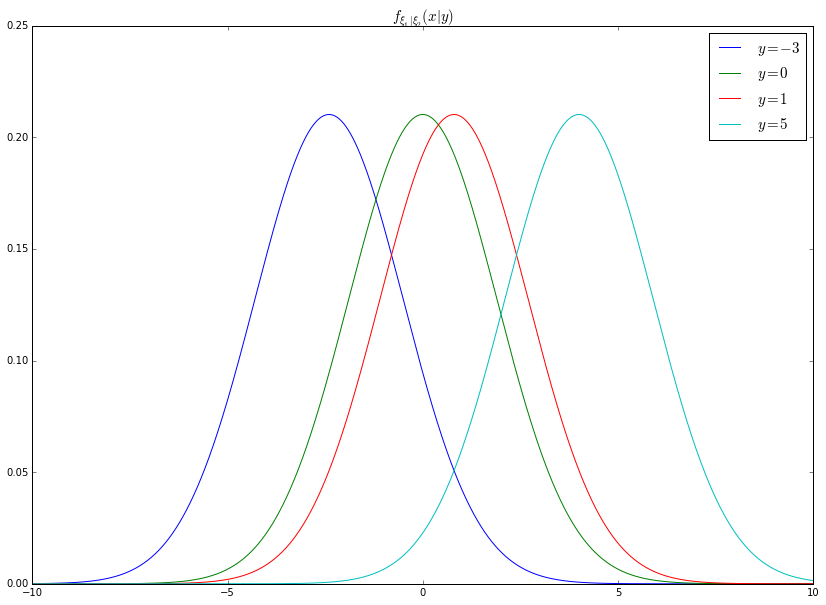

In [35]:
# init graph
figure = plt.figure(figsize=(14, 10))

# generate distributions
y_dist = norm(A[1], np.sqrt(SIGMA[1][1]))
x_axis = np.arange(-10, 10, 0.01)
for y in [-3, 0, 1, 5]:
    y_axis = [x_dist.pdf([x, y]) for x in x_axis] / y_dist.pdf(y)
    plt.plot(x_axis, y_axis, label='$y = '+str(y)+'$')

# show graph
plt.title('$f_{\\xi_1 | \\xi_2}(x | y)$', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Построим график $E(\xi_1 \rvert~ \xi_2 = y)$. Для этого найдем $E(\xi_1 \rvert~ \xi_2 = y)$.

$$\mathrm{cov}(10\xi_1 - 8\xi_2,~ \xi_2) = 0 \Rightarrow (10\xi_1 - 8\xi_2) ~{\perp\!\!\!\perp}~ \xi_2$$

Из независимости следует, что 

$$E(10\xi_1 - 8\xi_2) = E(10\xi_1 - 8\xi_2 \rvert~ \xi_2) = E(\xi_1 \rvert~ \xi_2)$$

Раскладывая по линейности и учитывая, что $\xi_1,~ \xi_2 \sim N(0, \Sigma)$, получаем:

$$E(10\xi_1 - 8\xi_2 \rvert~ \xi_2) = 10E(\xi_1 \rvert~ \xi_2) - 8E(\xi_2 \rvert~ \xi_2) = 10E(\xi_1 \rvert~ \xi_2) - 8\xi_2 \Rightarrow E(\xi_1 \rvert~ \xi_2) = \frac45\xi_2$$

Построим **график зависимости** $E(\xi_1 \rvert~ \xi_2 = y)$ от $y$ и проведем прямую $E\xi_1$.

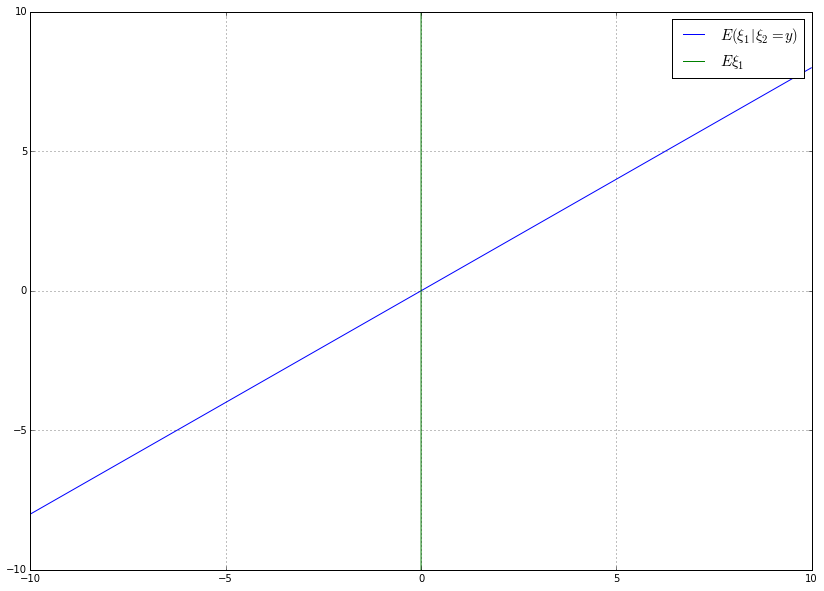

In [48]:
# init graph
figure = plt.figure(figsize=(14, 10))
y_axis = np.arange(-10, 10, 0.01)
plt.axis([-10, 10, -10, 10])

# show graph
plt.plot(y_axis, (4 / 5) * y_axis, label='$E(\\xi_1 | \\xi_2 = y)$')
mean = [norm.mean(A[0]) for i in range(len(x_axis))]
plt.plot(mean, y_axis, label="$E\\xi_1$")
plt.legend(fontsize=15)
plt.grid()
plt.show()